In [13]:
%pwd

'/Users/christopherpoptic/clinical_research_workflow/notebooks/chris'

<IPython.core.display.Javascript object>

In [14]:
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [15]:
# from https://preview.nferx.com/sdk_docs/build.html
import os
import sys
from pprint import pprint
from pathlib import Path
import logging
import logging.config

<IPython.core.display.Javascript object>

In [62]:
# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

<IPython.core.display.Javascript object>

In [16]:
# import credentials
# https://kedro.readthedocs.io/en/stable/04_kedro_project_setup/02_configuration.html
from kedro.config import ConfigLoader

# conf_paths = ["../conf/base", "../conf/local"]
BASE_DIR = Path("/Users/christopherpoptic/clinical_research_workflow")
LOGS_DIR = Path(BASE_DIR, "logs")
LOG_FILE = Path(LOGS_DIR, "my_logs.log")

conf_paths = [Path(BASE_DIR, "conf/local"), Path(BASE_DIR, "conf/base")]
print(f"conf_paths are:  {conf_paths}")

print(f"Loading config params from parameters.yml...")
conf_loader = ConfigLoader(conf_paths)
credentials = conf_loader.get("credentials*", "credentials*/**")
params = conf_loader.get(
    "parameters*", "parameters*/**", "**parameters*"
)  # Get the configuration params & hyperparams
# parameter_value = params['parameter_name']
drugs = params["DRUG_LIST"]
num_months = params["NUM_MONTHS"]
disease_name = params["DISEASE_NAME"]
DEFAULT_LEVEL = params["DEFAULT_LEVEL"]

# Environment setup
os.environ["X_NFER_BASEURL"] = "https://preview.nferx.com"
os.environ["NFERENCE_USER"] = credentials["nfer_access_key"]  # "yash@nference.net"
os.environ["NFERENCE_TOKEN"] = credentials["nfer_secret_key"]  # "<api_token>"

conf_paths are:  [PosixPath('/Users/christopherpoptic/clinical_research_workflow/conf/local'), PosixPath('/Users/christopherpoptic/clinical_research_workflow/conf/base')]
Loading config params from parameters.yml...


<IPython.core.display.Javascript object>

In [17]:
# the nference email address and Github Personal Access Token are respectively stored as:
# credentials[nfer_access_key]
# credentials[nfer_secret_key]

<IPython.core.display.Javascript object>

In [18]:
#
# rec = RecordsAPIWrapper(creds={ "NFERENCE_USER": "<user>",  "NFERENCE_TOKEN": "<token>" })

# rec = RecordsAPIWrapper(creds={ "NFERENCE_USER": os.environ['NFERENCE_USER'],  "NFERENCE_TOKEN": os.environ['NFERENCE_TOKEN']  })

# rec = RecordsAPIWrapper(creds={ "NFERENCE_USER": credentials['nfer_access_key'], "NFERENCE_TOKEN": credentials['nfer_secret_key'] )

<IPython.core.display.Javascript object>

In [19]:
# import requests, base64
# base_url = os.environ.get('X_NFER_BASEURL',None)
# url = base_url + '/api/get_data_versions?'

# access_key = os.environ['NFERENCE_USER']
# secret_key = os.environ['NFERENCE_TOKEN']

# key = '%s:%s' % (access_key, secret_key)
# sig = base64.standard_b64encode(key.encode('utf-8')).decode('utf-8')

# headers = {'Authorization': 'Basic %s' % sig}

# r = requests.get(url=url, headers=headers, verify=True, timeout=60)
# if r.status_code == 200:
#     data = r.json()
# print(r.text)
# print(r.url)
# print(r.headers)
# pprint(r.headers.items())

<IPython.core.display.Javascript object>

In [20]:
# Add SDK path to sys.path for importing SDK modules
# sdkPath = '/Users/christopherpoptic/repos/lumenbiomics/sdk'
# sys.path.append(sdkPath)

<IPython.core.display.Javascript object>

# Data Overview
### https://preview.nferx.com/sdk_docs/overview_notebooks/01_Data%20Overview.html

In [21]:
from nferx_sdk.data_sources import RecordsAPIWrapper

# from nferx_sdk.utils.query import *
from nferx_sdk.utils.query import inQuery, andQuery

<IPython.core.display.Javascript object>

In [22]:
from nferx_sdk.data_sources import ClinicalTrialsAPIWrapper

<IPython.core.display.Javascript object>

In [23]:
clin = ClinicalTrialsAPIWrapper()

X_NFER_BASEURL: https://preview.nferx.com
DEBUG: False
NFERENCE_USER: cpoptic@nference.net


<IPython.core.display.Javascript object>

In [24]:
rec = RecordsAPIWrapper()

X_NFER_BASEURL: https://preview.nferx.com
DEBUG: False
NFERENCE_USER: cpoptic@nference.net
Data Type: ClinicalData
Default Data Version: physician_notes
Available Data Version  ['physician_notes_disk', 'physician_notes']


<IPython.core.display.Javascript object>

## Overview of Hybrid Cohorts Data Structure in SDK

In [25]:
drugs = [
    "venlafaxine",
    "Sertraline",
    "Paroxetine",
    "milnacipran",
    "levomilnacipran",
    "Fluvoxamine",
    "Fluoxetine",
    "Escitalopram",
    "duloxetine",
    "Desvenlafaxine",
    "Citalopram",
]

<IPython.core.display.Javascript object>

In [26]:
medication_df = rec.medication(tokens=drugs)

<IPython.core.display.Javascript object>

In [27]:
medication_df.shape, medication_df.columns

((7, 3),
 Index(['Column Name', 'No of Patients', 'No of Rows'], dtype='object'))

<IPython.core.display.Javascript object>

In [28]:
medication_df

,Column Name,No of Patients,No of Rows
1,order_drugs,98569,654344
2,med_generic,96350,882123
3,order_description,95345,631543
4,medication_generic_name,57026,179764
5,meds_drugs,24942,245228
6,med_generic_name_description,24942,245227
7,med_name_description,18182,165536


<IPython.core.display.Javascript object>

In [29]:
cml_codes = rec.getDiagnosticCodesFromDisease("CML")

<IPython.core.display.Javascript object>

In [30]:
cml_full_name_codes = rec.getDiagnosticCodesFromDisease("chronic myeloid leukemia")

<IPython.core.display.Javascript object>

In [31]:
both = list(set(cml_codes) & set(cml_full_name_codes))
print(sorted(both))

['02051110', '02899370', '105329013', '105330015', '105331016', '1217278018', '1217279014', '1218766018', '1218767010', '153446019', '153447011', '153448018', '1772080015', '1773807012', '1775093018', '201656010', '205.1', '205.10', '205.11', '205.12', '207403012', '2531158010', '2531159019', '2531160012', '2531161011', '2531162016', '2534648014', '2534649018', '2534650018', '2534651019', '2534652014', '2534653016', '2534654010', '2534655011', '2534656012', '2534657015', '2534658013', '2537477010', '2537478017', '2770413014', '2772431018', '2837901015', '2837902010', '2897550015', '2898684014', '289899015', '289900013', '2899857015', '2899858013', '2901809010', '572065019', '836420010', '836421014', 'C92.1', 'C92.10', 'C92.11', 'C92.12']


<IPython.core.display.Javascript object>

In [32]:
len(cml_codes)

57

<IPython.core.display.Javascript object>

In [33]:
# Find the ICD codes related to Major Depressive Disorder
mdd_codes = rec.getDiagnosticCodesFromDisease("Major Depressive Disorder")

<IPython.core.display.Javascript object>

In [34]:
mdd_codes

['296.20',
 '296.2',
 '296.3',
 '296.30',
 'F32.9',
 'F33.1',
 'F33.9',
 'F33.0',
 'F32.1',
 'F33.42',
 'F33.41',
 'F33.2',
 'F32.0',
 'F32.5',
 'F32.2',
 'F32.4',
 'F33.40',
 'F33.3',
 'F32.3',
 'F32',
 'F33.4',
 'F33',
 '1208903011',
 '31734016',
 '67318015',
 '110183011',
 '2967289019',
 '55297012',
 '3304524018',
 '77113019',
 '401766011',
 '60885016',
 '294826016',
 '61592011',
 '294831019',
 '112983018',
 '294825017',
 '43436011',
 '441826016',
 '575312011',
 '25793014',
 '764437010',
 '71628011',
 '3447110019',
 '809332011',
 '759158012',
 '3005871013',
 '3005851016',
 '811444017',
 '3320813013',
 '575318010',
 '294832014',
 '575315013',
 '3304523012',
 '3320811010',
 '3646265011',
 '3646267015',
 '743291014',
 '783572012',
 '3005831015',
 '105998019',
 '764501019',
 '1064901000119115',
 '47670016',
 '3646264010',
 '3447117016',
 '767531018',
 '768230018',
 '575317017',
 '110184017',
 '575314012',
 '575319019',
 '3447116013',
 '294824018',
 '3447115012',
 '3646260018',
 '5753110

<IPython.core.display.Javascript object>

In [35]:
meds_query = inQuery(
    [
        "medication_generic_name",
        "order_description",
        "med_generic",
        "order_drugs",
        "meds_drugs",
        "med_generic",
        "med_name_description",
        "med_generic_name_description",
    ],
    drugs,
)
codes_query = inQuery("diagnosis_code", mdd_codes)
query = andQuery(meds_query, codes_query)

<IPython.core.display.Javascript object>

In [36]:
query

'medication_generic_name:venlafaxine,medication_generic_name:Sertraline,medication_generic_name:Paroxetine,medication_generic_name:milnacipran,medication_generic_name:levomilnacipran,medication_generic_name:Fluvoxamine,medication_generic_name:Fluoxetine,medication_generic_name:Escitalopram,medication_generic_name:duloxetine,medication_generic_name:Desvenlafaxine,medication_generic_name:Citalopram,order_description:venlafaxine,order_description:Sertraline,order_description:Paroxetine,order_description:milnacipran,order_description:levomilnacipran,order_description:Fluvoxamine,order_description:Fluoxetine,order_description:Escitalopram,order_description:duloxetine,order_description:Desvenlafaxine,order_description:Citalopram,med_generic:venlafaxine,med_generic:Sertraline,med_generic:Paroxetine,med_generic:milnacipran,med_generic:levomilnacipran,med_generic:Fluvoxamine,med_generic:Fluoxetine,med_generic:Escitalopram,med_generic:duloxetine,med_generic:Desvenlafaxine,med_generic:Citalopram,

<IPython.core.display.Javascript object>

In [37]:
query.split(",")

['medication_generic_name:venlafaxine',
 'medication_generic_name:Sertraline',
 'medication_generic_name:Paroxetine',
 'medication_generic_name:milnacipran',
 'medication_generic_name:levomilnacipran',
 'medication_generic_name:Fluvoxamine',
 'medication_generic_name:Fluoxetine',
 'medication_generic_name:Escitalopram',
 'medication_generic_name:duloxetine',
 'medication_generic_name:Desvenlafaxine',
 'medication_generic_name:Citalopram',
 'order_description:venlafaxine',
 'order_description:Sertraline',
 'order_description:Paroxetine',
 'order_description:milnacipran',
 'order_description:levomilnacipran',
 'order_description:Fluvoxamine',
 'order_description:Fluoxetine',
 'order_description:Escitalopram',
 'order_description:duloxetine',
 'order_description:Desvenlafaxine',
 'order_description:Citalopram',
 'med_generic:venlafaxine',
 'med_generic:Sertraline',
 'med_generic:Paroxetine',
 'med_generic:milnacipran',
 'med_generic:levomilnacipran',
 'med_generic:Fluvoxamine',
 'med_gene

<IPython.core.display.Javascript object>

In [44]:
cohort1 = rec.makeCohort(
    cohortName="mdd_full", cohortSpecifier=query, timeWindow="full"
)
cohort1.initDump(
    cohortProjector=["patient_id", "timestamp", "diagnosis_code", "meds_drugs"]
)

<IPython.core.display.Javascript object>

In [45]:
type(cohort1)

nferx_sdk.data_sources.hybridcohort_sdk.Cohort

<IPython.core.display.Javascript object>

In [46]:
cohort1.getTotalPatients()

43320

<IPython.core.display.Javascript object>

In [41]:
cohort1.getTotalRecords()

18805740

<IPython.core.display.Javascript object>

In [42]:
cohort1.getTotalRecords() / cohort1.getTotalPatients()

434.112188365651

<IPython.core.display.Javascript object>

In [47]:
if cohort1.advanceDF():
    df = cohort1.getDF()
    display(df)

,timestamp,diagnosis_code,patient_id,meds_drugs
1,-47580,k21.9,100044,acetaminophen
2,-47580,j01.90,100044,dexamethasone
3,157945,k21.9,100044,NaN
4,52724188,n76.0,100044,NaN
5,52724188,r30.0,100044,
...,...,...,...,...
58891,46581720,o76,101596,
58892,46581720,z37.0,101596,
58893,46581720,o47.03,101596,
58894,46581720,z3a.34,101596,


<IPython.core.display.Javascript object>

### Case 2: Create a cohort of patients who were ever diagnosed with MDD and have administered the drugs venlafaxine etc within an interval of 3 months after being diagnosed in their medical record history

In [48]:
cohort2 = rec.makeCohort(
    "mdd_test_2", cohortSpecifier=query, timeWindow=3, unit="months"
)
cohort2.initDump(
    cohortProjector=[
        "patient_id",
        "timestamp",
        "diagnosis_code",
        "meds_drugs",
        "disease",
    ]
)
cohort2.getTotalPatients()

523

<IPython.core.display.Javascript object>

In [49]:
cohort2.getTotalRecords()

540

<IPython.core.display.Javascript object>

In [50]:
if cohort2.advanceDF():
    df = cohort2.getDF()
    display(df)

,timestamp,diagnosis_code,disease,patient_id,meds_drugs
1,52724188,n76.0,vaginitis,100044,misoprostol
2,52724188,r30.0,dysuria,100044,
3,56439388,r53.83,fatigue,100044,NaN
4,57044188,f41.1,generalized anxiety disorder,100044,NaN
5,57044188,f33.9,major depressive disorder,100044,
...,...,...,...,...,...
76514,381465764,z90.49,,103495,
76515,381465764,z68.31,septic shock,103495,
76516,381465764,z79.01,severe sepsis,103495,
76517,381465764,z79.52,,103495,


<IPython.core.display.Javascript object>

In [51]:
df.nunique()

timestamp         20829
diagnosis_code     3369
disease            1382
patient_id          322
meds_drugs          383
dtype: int64

<IPython.core.display.Javascript object>

### Get most significant labtests done for the set of patients identified in case 1

In [57]:
cohort1.getDF().head()

,timestamp,diagnosis_code,patient_id,meds_drugs
1,-47580,k21.9,100044,acetaminophen
2,-47580,j01.90,100044,dexamethasone
3,157945,k21.9,100044,NaN
4,52724188,n76.0,100044,NaN
5,52724188,r30.0,100044,


<IPython.core.display.Javascript object>

In [58]:
cohort1.getDF().shape

(58895, 4)

<IPython.core.display.Javascript object>

In [64]:
labtest_df = cohort1.getNumericEnrichments(category="labtest")
labtest_df.head()

,Column Name,Cohen's D Lab Test Score,Cohen's D,Count (Cohort),Min (Cohort),Min (Column),Max (Cohort),Max (Column),Mean (Cohort),Mean (Column),Std Dev (Cohort),Std Dev (Column)
1,Erythrocyte sedimentation rate by Westergren method,1.088,0.260,35735.0,0.0,0.0,53819.281,53819.281,13190.388,9519.499,15870.034,13776.229
2,Leukocytes [#/volume] in Blood by Automated count,0.987,0.215,563155.0,0.0,0.0,53820.789,53820.809,10913.717,7739.693,16294.502,14466.235
3,Protein [Mass/volume] in Urine,0.986,0.291,7037.0,1.0,1.0,64597.262,64597.262,15780.614,10942.225,19056.932,16143.271
4,Neutrophils [#/volume] in Blood by Automated count,0.977,0.214,375684.0,0.0,0.0,76999.891,76999.961,18186.557,13723.589,22780.540,20438.169
5,Homocysteine cysteine disulfide/Creatinine [Ratio] in Urine,0.945,1.352,4.0,12.0,2.0,86.000,86.000,32.750,12.565,30.801,12.249


<IPython.core.display.Javascript object>

In [78]:
labtest_df["Cohen's D Lab Test Score"].min()

-0.95

<IPython.core.display.Javascript object>

In [76]:
labtest_df["Cohen's D Lab Test Score"].median()

0.0

<IPython.core.display.Javascript object>

In [77]:
labtest_df["Cohen's D Lab Test Score"].max()

1.088

<IPython.core.display.Javascript object>

In [75]:
labtest_df[labtest_df["Cohen's D Lab Test Score"] < 0].count()

Column Name                 2883
Cohen's D Lab Test Score    2883
Cohen's D                   2883
Count (Cohort)              2883
Min (Cohort)                2883
Min (Column)                2883
Max (Cohort)                2883
Max (Column)                2883
Mean (Cohort)               2883
Mean (Column)               2883
Std Dev (Cohort)            2883
Std Dev (Column)            2883
dtype: int64

<IPython.core.display.Javascript object>

In [74]:
labtest_df[labtest_df["Mean (Cohort)"] < 0]

,Column Name,Cohen's D Lab Test Score,Cohen's D,Count (Cohort),Min (Cohort),Min (Column),Max (Cohort),Max (Column),Mean (Cohort),Mean (Column),Std Dev (Cohort),Std Dev (Column)
793,Calcium oxalate [Energy Difference] in 24 hour Urine,0.247,0.094,829.0,-7.482000e+01,-7.497000e+01,4.640000e+00,4.640000e+00,-1.416200e+01,-1.644200e+01,2.373400e+01,2.420100e+01
857,Base excess in Arterial cord blood by calculation,0.231,0.137,51.0,-1.510000e+01,-1.533000e+01,4.800000e+00,4.880000e+00,-2.940000e+00,-3.731000e+00,5.418000e+00,5.841000e+00
1964,U Brush Crys-Mayo,0.071,0.043,54.0,-5.590000e+00,-5.780000e+00,2.620000e+00,2.660000e+00,-1.085000e+00,-1.194000e+00,2.524000e+00,2.558000e+00
2262,Base excess in Mixed venous blood by calculation,0.038,0.040,20.0,-1.200000e+01,-1.300000e+01,4.000000e+00,6.000000e+00,-3.850000e+00,-4.070000e+00,5.659000e+00,5.387000e+00
2283,Base Excess Cord Art,0.035,0.058,3.0,-2.000000e+00,-3.920000e+00,3.000000e-01,1.850000e+00,-9.230000e-01,-1.027000e+00,9.450000e-01,1.800000e+00
2339,Coagulation index in Blood by Thromboelastography,0.030,0.012,3323.0,-6.810000e+01,-6.810000e+01,6.690000e+00,6.700000e+00,-1.524000e+01,-1.550100e+01,2.161400e+01,2.152600e+01
2724,Urea nitrogen/Creatinine [Mass Ratio] in Serum or Plasma,-0.000,-0.000,7794.0,-9.990000e+02,-9.990000e+02,1.888200e+02,1.889000e+02,-3.985090e+02,-3.984990e+02,3.450610e+02,3.443990e+02
2875,HXHIV 1/2 Ext QC Exp Date,0.000,0.000,9.0,-9.223372e+14,-9.223372e+14,-9.223372e+14,-9.223372e+14,-9.223372e+14,-9.223372e+14,0.000000e+00,0.000000e+00
3531,BUN/Creat Ratio......................MHS,-0.039,-0.011,7058.0,-9.987600e+02,-9.989300e+02,1.299900e+02,1.299900e+02,-4.305490e+02,-4.268470e+02,3.276160e+02,3.289800e+02
3675,Osmolality Calc......................MHS,-0.054,-0.020,1717.0,-9.983900e+02,-9.988400e+02,3.578900e+02,3.583000e+02,-3.330500e+02,-3.252230e+02,3.909310e+02,3.898200e+02


<IPython.core.display.Javascript object>

In [70]:
labtest_df.describe()

,Cohen's D Lab Test Score,Cohen's D,Count (Cohort),Min (Cohort),Min (Column),Max (Cohort),Max (Column),Mean (Cohort),Mean (Column),Std Dev (Cohort),Std Dev (Column)
count,5983.000000,5983.000000,5983.000000,5.983000e+03,5.983000e+03,5.983000e+03,5.983000e+03,5.983000e+03,5.983000e+03,5.983000e+03,5.983000e+03
mean,-0.009260,-0.004962,3801.902056,-3.044959e+11,-4.588829e+11,1.550394e+11,1.705841e+11,-3.615453e+09,-4.891800e+10,1.048316e+11,1.739796e+11
std,0.238951,0.390760,33322.328058,1.686409e+13,2.065165e+13,1.957081e+13,1.961400e+13,1.410586e+13,1.476574e+13,4.860910e+12,7.207750e+12
min,-0.950000,-2.195000,1.000000,-9.223372e+14,-9.223372e+14,-9.223372e+14,-9.223372e+14,-9.223372e+14,-9.223372e+14,0.000000e+00,0.000000e+00
25%,-0.150000,-0.116000,3.000000,5.650000e-01,3.500000e-01,1.190000e+01,1.481500e+01,7.159000e+00,7.302000e+00,1.197000e+00,2.876500e+00
50%,0.000000,0.000000,16.000000,4.240000e+00,2.000000e+00,8.000000e+01,9.200000e+01,4.450000e+01,4.637600e+01,1.536100e+01,2.146200e+01
75%,0.127500,0.099000,110.000000,3.300000e+01,1.730000e+01,5.325000e+02,6.000000e+02,2.626345e+02,2.670775e+02,1.116350e+02,1.464375e+02
max,1.088000,2.504000,717919.000000,2.018052e+13,2.018051e+13,8.888268e+14,8.888268e+14,4.463440e+14,4.560197e+14,2.705954e+14,4.347970e+14


<IPython.core.display.Javascript object>

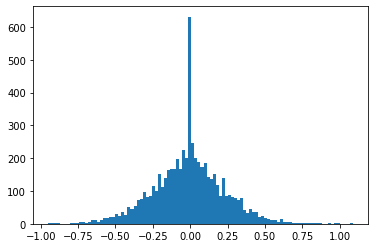

<IPython.core.display.Javascript object>

In [80]:
plt.hist(labtest_df["Cohen's D Lab Test Score"], bins=100)
plt.show()

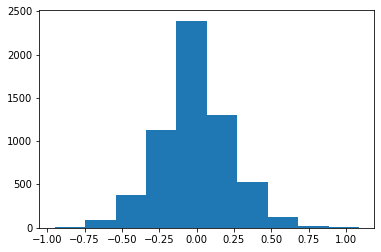

<IPython.core.display.Javascript object>

In [81]:
plt.hist(labtest_df["Cohen's D Lab Test Score"], bins=10)
plt.show()

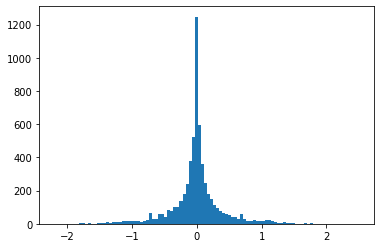

<IPython.core.display.Javascript object>

In [82]:
plt.hist(labtest_df["Cohen's D"], bins=100)
plt.show()

In [53]:
labtest_df.nunique()

Column Name                 5983
Cohen's D Lab Test Score    1155
Cohen's D                   1559
Count (Cohort)              1123
Min (Cohort)                2143
Min (Column)                1718
Max (Cohort)                4014
Max (Column)                3975
Mean (Cohort)               5244
Mean (Column)               5585
Std Dev (Cohort)            4720
Std Dev (Column)            5312
dtype: int64

<IPython.core.display.Javascript object>

In [54]:
labtest_df.shape

(5983, 12)

<IPython.core.display.Javascript object>

### Get most significant diagnosis_code for the set of patients identified in case 2


In [83]:
diagnosis_df = cohort2.getSignals(
    cohortProjector="diagnosis_code", control="neighborhood", topN=10
)
diagnosis_df

Exception: Failed to get supported columns. Error 200